## Khai b√°o c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt

In [229]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, f1_score
from my_algorithm import algorithm

## ƒë·ªçc file csv ·ªü trong m√°y t√≠nh
df = DataFrame

In [230]:
df = pd.read_csv("D:\data.csv")

in ra 10 gi√° tr·ªã ƒë·∫ßu ti√™n

In [231]:
df.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

# √ù nghƒ©a c·ªßa 32 thu·ªôc t√≠nh trong d·ªØ li·ªáu:

1. id: M√£ ƒë·ªãnh danh c·ªßa m·ªói b·ªánh nh√¢n ho·∫∑c m·∫´u.
2. diagnosis: K·∫øt qu·∫£ ch·∫©n ƒëo√°n, th∆∞·ªùng s·∫Ω l√† "M" (Malignant - √°c t√≠nh) ho·∫∑c "B" (Benign - l√†nh t√≠nh).
3. radius_mean: B√°n k√≠nh trung b√¨nh c·ªßa kh·ªëi u, th∆∞·ªùng ƒë∆∞·ª£c t√≠nh t·ª´ chu vi.
4. texture_mean: ƒê·ªô nh√°m trung b√¨nh tr√™n b·ªÅ m·∫∑t kh·ªëi u.
5. perimeter_mean: Chu vi trung b√¨nh c·ªßa kh·ªëi u.
6. area_mean: Di·ªán t√≠ch trung b√¨nh c·ªßa kh·ªëi u.
7. smoothness_mean: ƒê·ªô nh·∫µn trung b√¨nh c·ªßa kh·ªëi u, bi·ªÉu th·ªã ƒë·ªô ƒë·ªÅu c·ªßa ƒë∆∞·ªùng vi·ªÅn.
8. compactness_mean: ƒê·ªô ch·∫∑t trung b√¨nh c·ªßa kh·ªëi u, t√≠nh b·∫±ng c√¥ng th·ª©c (chu vi^2 / di·ªán t√≠ch - 1.0).
9. concavity_mean: M·ª©c ƒë·ªô l√µm trung b√¨nh trong ƒë∆∞·ªùng vi·ªÅn c·ªßa kh·ªëi u.
10. concave points_mean: S·ªë ƒëi·ªÉm l√µm trung b√¨nh tr√™n ƒë∆∞·ªùng vi·ªÅn c·ªßa kh·ªëi u.
11. symmetry_mean: ƒê·ªô ƒë·ªëi x·ª©ng trung b√¨nh c·ªßa kh·ªëi u.
12. fractal_dimension_mean: K√≠ch th∆∞·ªõc fractal trung b√¨nh c·ªßa kh·ªëi u, ch·ªâ s·ªë cho th·∫•y m·ª©c ƒë·ªô ph·ª©c t·∫°p c·ªßa h√¨nh d·∫°ng.
13. --> 22 C√°c thu·ªôc t√≠nh c√≥ h·∫≠u t·ªë "_se" (nh∆∞ radius_se, texture_se, ...) l√† sai s·ªë chu·∫©n c·ªßa c√°c gi√° tr·ªã t∆∞∆°ng ·ª©ng, cho bi·∫øt m·ª©c ƒë·ªô bi·∫øn thi√™n c·ªßa c√°c thu·ªôc t√≠nh n√†y.
23. --> 32 C√°c thu·ªôc t√≠nh c√≥ h·∫≠u t·ªë "_worst" (nh∆∞ radius_worst, texture_worst, ...) l√† gi√° tr·ªã l·ªõn nh·∫•t c·ªßa c√°c thu·ªôc t√≠nh t∆∞∆°ng ·ª©ng, bi·ªÉu th·ªã k√≠ch th∆∞·ªõc ho·∫∑c ƒë·ªô n·∫∑ng nh·∫•t c·ªßa kh·ªëi u trong c√°c ƒë·∫∑c ƒëi·ªÉm n√†y.

Nh·ªØng thu·ªôc t√≠nh n√†y th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ph√¢n t√≠ch v√† ch·∫©n ƒëo√°n ung th∆∞ v√∫, ƒë·∫∑c bi·ªát trong vi·ªác ph√¢n bi·ªát gi·ªØa kh·ªëi u √°c t√≠nh v√† l√†nh t√≠nh d·ª±a tr√™n h√¨nh th√°i v√† c√°c ƒë·∫∑c ƒëi·ªÉm b·ªÅ m·∫∑t c·ªßa kh·ªëi u.

Hi·ªÉn th·ªã k√≠ch th∆∞·ªõc c·ªßa b·∫£ng d·ªØ li·ªáu

In [232]:
df.shape

(569, 33)

## L√†m s·∫°ch d·ªØ li·ªáu v√† ph√¢n t√≠ch

Hi·ªÉn th·ªã th√¥ng tin t√≥m t·∫Øt v·ªÅ DataFrame df. C·ª• th·ªÉ cung c·∫•p c√°c th√¥ng tin sau:
- S·ªë h√†ng v√† s·ªë c·ªôt c·ªßa df
- T√™n c·ªôt v√† lo·∫°i d·ªØ li·ªáu t∆∞∆°ng ·ª©ng c·ªßa t·ª´ng c·ªôt
- S·ªë l∆∞·ª£ng gi√° tr·ªã kh√¥ng b·ªã thi·∫øu c·ªßa t·ª´ng c·ªôt
- T·ªïng dung l∆∞·ª£ng b·ªô nh·ªõ m√† df s·ª≠ d·ª•ng

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

L·ªánh **df.isna().sum()** trong pandas ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ki·ªÉm tra s·ªë l∆∞·ª£ng gi√° tr·ªã b·ªã thi·∫øu (NaN - Not a Number) trong m·ªói c·ªôt c·ªßa DataFrame df. C·ª• th·ªÉ:
- **df.isna()**: Tr·∫£ v·ªÅ m·ªôt DataFrame v·ªõi c√°c gi√° tr·ªã boolean, trong ƒë√≥ True ch·ªâ ra gi√° tr·ªã b·ªã thi·∫øu (NaN) v√† False ch·ªâ ra gi√° tr·ªã kh√¥ng b·ªã thi·∫øu.
- **sum()**: T·ªïng h·ª£p s·ªë l∆∞·ª£ng gi√° tr·ªã True (gi√° tr·ªã b·ªã thi·∫øu) trong m·ªói c·ªôt.
K·∫øt qu·∫£ l√† m·ªôt danh s√°ch cho bi·∫øt s·ªë l∆∞·ª£ng gi√° tr·ªã thi·∫øu trong t·ª´ng c·ªôt c·ªßa DataFrame.

In [234]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

L·ªánh **df['diagnosis'].value_counts()** trong pandas ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ƒë·∫øm s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã kh√°c nhau trong c·ªôt diagnosis c·ªßa DataFrame df.

C·ª• th·ªÉ, n·∫øu c·ªôt diagnosis ch·ª©a c√°c gi√° tr·ªã nh∆∞ 'M' (malignant - √°c t√≠nh) v√† 'B' (benign - l√†nh t√≠nh), l·ªánh n√†y s·∫Ω tr·∫£ v·ªÅ s·ªë l∆∞·ª£ng c√°c m·∫´u t∆∞∆°ng ·ª©ng cho m·ªói lo·∫°i ch·∫©n ƒëo√°n. K·∫øt qu·∫£ s·∫Ω l√† m·ªôt b·∫£ng li·ªát k√™ s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã xu·∫•t hi·ªán trong c·ªôt, gi√∫p b·∫°n hi·ªÉu r√µ s·ª± ph√¢n b·ªë c·ªßa c√°c nh√£n ch·∫©n ƒëo√°n trong d·ªØ li·ªáu.

In [235]:
print(df['diagnosis'].value_counts())
# t√≠nh t·ªâ l·ªá ph·∫ßn trƒÉm c·ªßa bi·∫øn m·ª•c ti√™u
# c√∫ ph√°p df['t√™n c·ªôt'].value_counts(True)
df['diagnosis'].value_counts(True)

diagnosis
B    357
M    212
Name: count, dtype: int64


diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

ƒê·∫øm s·ªë m·∫´u d·ªØ li·ªáu nh·∫≠n gi√° tr·ªã l√† 0 ·ªü m·ªói thu·ªôc t√≠nh:

In [236]:
zero_count = (df == 0).sum()
zero_count

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
Unnamed: 32                 0
dtype: int

# X·ª≠ l√Ω ngo·∫°i lai: c√°c thu·ªôc t√≠nh c√≥ gi√° tr·ªã l√† 0

B·∫±ng c√°ch thay gi√° tr·ªã 0 trong c·ªôt b·∫±ng gi√° tr·ªã trung b√¨nh c·ªßa c√°c ph·∫ßn t·ª≠ kh√°c 0 trong c·ªôt

In [237]:
print("D·ªØ li·ªáu ban ƒë·∫ßu:")
print(df)

# T√≠nh gi√° tr·ªã trung b√¨nh c·ªßa c·ªôt 'col1', b·ªè qua c√°c gi√° tr·ªã 0
mean_value_concavity_mean = df[df['concavity_mean'] != 0]['concavity_mean'].mean()
mean_value_concave_points_mean = df[df['concave points_mean'] != 0]['concave points_mean'].mean() 
mean_value_concavity_se = df[df['concavity_se'] != 0]['concavity_se'].mean()
mean_value_concave_points_se = df[df['concave points_se'] != 0]['concave points_se'].mean()
mean_value_concave_concave_points_worst = df[df['concave points_worst'] != 0]['concave points_worst'].mean()

# Thay th·∫ø t·∫•t c·∫£ c√°c gi√° tr·ªã 0 trong c·ªôt 'col1' b·∫±ng gi√° tr·ªã trung b√¨nh
df['concavity_mean'] = df['concavity_mean'].replace(0, mean_value_concavity_mean)
df['concave points_mean'] = df['concave points_mean'].replace(0, mean_value_concave_points_mean)
df['concavity_se'] = df['concavity_se'].replace(0, mean_value_concavity_se)
df['concave points_se'] = df['concave points_se'].replace(0, mean_value_concave_points_se)
df['concave points_worst'] = df['concave points_worst'].replace(0, mean_value_concave_concave_points_worst)


print("\nD·ªØ li·ªáu sau khi thay th·∫ø 0 b·∫±ng gi√° tr·ªã trung b√¨nh:")
print(df)


D·ªØ li·ªáu ban ƒë·∫ßu:
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

   

L·ªánh df['diagnosis'].replace({"B":"0", "M":"1"}, inplace=True) trong pandas ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ thay th·∫ø c√°c gi√° tr·ªã trong c·ªôt diagnosis c·ªßa DataFrame df:

- "B" (Benign - l√†nh t√≠nh) s·∫Ω ƒë∆∞·ª£c thay th·∫ø b·∫±ng "0".
- "M" (Malignant - √°c t√≠nh) s·∫Ω ƒë∆∞·ª£c thay th·∫ø b·∫±ng "1".
- Tham s·ªë inplace=True ƒë·∫£m b·∫£o r·∫±ng c√°c thay ƒë·ªïi s·∫Ω ƒë∆∞·ª£c th·ª±c hi·ªán tr·ª±c ti·∫øp trong DataFrame m√† kh√¥ng c·∫ßn t·∫°o m·ªôt b·∫£n sao m·ªõi. ƒê√¢y l√† c√°ch chuy·ªÉn ƒë·ªïi nh√£n t·ª´ d·∫°ng k√Ω t·ª± sang d·∫°ng s·ªë ƒë·ªÉ d·ªÖ x·ª≠ l√Ω trong c√°c m√¥ h√¨nh h·ªçc m√°y.

In [238]:
df['diagnosis'].replace({"B":"0", "M":"1"}, inplace=True)

L·ªánh sns.catplot(x='diagnosis', data=df, kind='count') s·ª≠ d·ª•ng th∆∞ vi·ªán **Seaborn** ƒë·ªÉ t·∫°o bi·ªÉu ƒë·ªì c·ªôt (count plot) hi·ªÉn th·ªã s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã kh√°c nhau trong c·ªôt diagnosis c·ªßa DataFrame df.

- x='diagnosis': Tr·ª•c x hi·ªÉn th·ªã c√°c gi√° tr·ªã c·ªßa c·ªôt diagnosis (v√≠ d·ª•: 0 v√† 1 sau khi ƒë√£ thay th·∫ø).
- data=df: S·ª≠ d·ª•ng d·ªØ li·ªáu t·ª´ DataFrame df.
- kind='count': T·∫°o bi·ªÉu ƒë·ªì c·ªôt, trong ƒë√≥ chi·ªÅu cao c·ªßa c√°c c·ªôt bi·ªÉu th·ªã s·ªë l∆∞·ª£ng m·ªói lo·∫°i gi√° tr·ªã trong c·ªôt diagnosis.

Bi·ªÉu ƒë·ªì n√†y gi√∫p tr·ª±c quan h√≥a s·ª± ph√¢n b·ªë c√°c nh√£n l√†nh t√≠nh v√† √°c t√≠nh.

Seaborn l√† m·ªôt th∆∞ vi·ªán tr·ª±c quan h√≥a d·ªØ li·ªáu ƒë∆∞·ª£c x√¢y d·ª±ng tr√™n Matplotlib, cung c·∫•p giao di·ªán d·ªÖ s·ª≠ d·ª•ng cho vi·ªác t·∫°o c√°c bi·ªÉu ƒë·ªì th·ªëng k√™. C√°c t√≠nh nƒÉng ch√≠nh c·ªßa Seaborn bao g·ªìm:

- Bi·ªÉu ƒë·ªì ph√¢n b·ªë (distribution plots): nh∆∞ distplot, kdeplot ƒë·ªÉ hi·ªÉn th·ªã ph√¢n ph·ªëi c·ªßa d·ªØ li·ªáu.
- Bi·ªÉu ƒë·ªì quan h·ªá (relational plots): nh∆∞ scatterplot, lineplot ƒë·ªÉ bi·ªÉu di·ªÖn m·ªëi quan h·ªá gi·ªØa c√°c bi·∫øn.
- Bi·ªÉu ƒë·ªì ph√¢n lo·∫°i (categorical plots): nh∆∞ barplot, boxplot, catplot ƒë·ªÉ so s√°nh gi·ªØa c√°c nh√≥m.

H·ªó tr·ª£ qu·∫£n l√Ω m√†u s·∫Øc v√† c√°c b·∫£ng m√†u ƒë·ªÉ hi·ªÉn th·ªã d·ªÖ hi·ªÉu h∆°n.

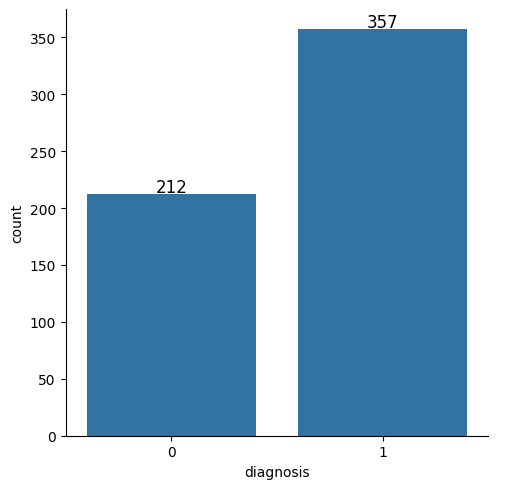

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# T·∫°o catplot, m·ªói th·∫ø n√†y th√¥i c≈©ng in ra ƒë∆∞·ª£c r·ªìi nh∆∞ng m√† s·∫Ω kh√¥ng hi·ªÉn th·ªã 357 v√† 212
g = sns.catplot(x='diagnosis', data=df, kind='count')

# L·∫•y tr·ª•c (axis) c·ªßa bi·ªÉu ƒë·ªì ƒë·ªÉ th√™m nh√£n
ax = g.ax

# S·ª≠a nh√£n tr√™n tr·ª•c x, ƒë·ªïi ki·ªÉu n√†y h∆°i nghi·ªáp d∆∞
#ax.set_xticklabels(['0', '1'])  # ƒê·ªïi nh√£n t·ª´ 0.0 th√†nh 0 v√† 1.0 th√†nh 1

# Chuy·ªÉn ƒë·ªïi nh√£n tr√™n tr·ª•c x sang d·∫°ng s·ªë nguy√™n
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Chuy·ªÉn s·ªë th·ª±c th√†nh s·ªë nguy√™n

# Ch√®n s·ªë l∆∞·ª£ng v√†o c·ªôt ƒë·∫ßu ti√™n v√† c·ªôt th·ª© hai
# L·∫•y c√°c ƒë·ªëi t∆∞·ª£ng c·ªôt t·ª´ ax.patches
for i, p in enumerate(ax.patches):
    # L·∫•y s·ªë l∆∞·ª£ng t·ª´ chi·ªÅu cao c·ªßa c·ªôt
    count = int(p.get_height())  # Chuy·ªÉn ƒë·ªïi s·ªë l∆∞·ª£ng th√†nh s·ªë nguy√™n
    
    # Ch√®n s·ªë l∆∞·ª£ng v√†o c·ªôt ƒë·∫ßu ti√™n v√† th·ª© hai
    if i == 0:  # C·ªôt ƒë·∫ßu ti√™n
        ax.annotate(f'{count}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # V·ªã tr√≠ nh√£n
                    ha='center', va='center',  # CƒÉn ch·ªânh nh√£n
                    fontsize=12, color='black',  # C√†i ƒë·∫∑t ph√¥ng ch·ªØ v√† m√†u s·∫Øc
                    xytext=(0, 5), textcoords='offset points')  # Kho·∫£ng c√°ch nh√£n
    elif i == 1:  # C·ªôt th·ª© hai
        ax.annotate(f'{count}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # V·ªã tr√≠ nh√£n
                    ha='center', va='center',  # CƒÉn ch·ªânh nh√£n
                    fontsize=12, color='black',  # C√†i ƒë·∫∑t ph√¥ng ch·ªØ v√† m√†u s·∫Øc
                    xytext=(0, 5), textcoords='offset points')  # Kho·∫£ng c√°ch nh√£n

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()


L·ªánh df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True) trong pandas ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ x√≥a hai c·ªôt 'id' v√† 'Unnamed: 32' ra kh·ªèi DataFrame df.

- axis=1: Ch·ªâ ƒë·ªãnh r·∫±ng b·∫°n ƒëang x√≥a c·ªôt (n·∫øu axis=0, b·∫°n s·∫Ω x√≥a h√†ng).
- inplace=True: Th·ª±c hi·ªán thay ƒë·ªïi tr·ª±c ti·∫øp tr√™n DataFrame df m√† kh√¥ng c·∫ßn t·∫°o m·ªôt b·∫£n sao m·ªõi.

L·ªánh n√†y th∆∞·ªùng ƒë∆∞·ª£c d√πng ƒë·ªÉ lo·∫°i b·ªè nh·ªØng c·ªôt kh√¥ng c·∫ßn thi·∫øt ho·∫∑c kh√¥ng c√≥ gi√° tr·ªã ph√¢n t√≠ch.

C·ªôt Unnamed: 32 th∆∞·ªùng xu·∫•t hi·ªán trong d·ªØ li·ªáu khi c√≥ m·ªôt c·ªôt th·ª´a ho·∫∑c kh√¥ng ƒë∆∞·ª£c ƒë·∫∑t t√™n, v√≠ d·ª•, do l·ªói khi nh·∫≠p d·ªØ li·ªáu t·ª´ file CSV. N√≥ c√≥ th·ªÉ l√† m·ªôt c·ªôt tr·ªëng ho·∫∑c ch·ª©a c√°c gi√° tr·ªã kh√¥ng c·∫ßn thi·∫øt. Trong tr∆∞·ªùng h·ª£p n√†y, l·ªánh df.drop(['Unnamed: 32'], axis=1) ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ lo·∫°i b·ªè c·ªôt n√†y nh·∫±m l√†m s·∫°ch d·ªØ li·ªáu tr∆∞·ªõc khi ti·∫øn h√†nh c√°c ph√¢n t√≠ch ho·∫∑c m√¥ h√¨nh h√≥a.

In [240]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [241]:
df.head(10)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         1        17.99         10.38          122.80     1001.0   
1         1        20.57         17.77          132.90     1326.0   
2         1        19.69         21.25          130.00     1203.0   
3         1        11.42         20.38           77.58      386.1   
4         1        20.29         14.34          135.10     1297.0   
5         1        12.45         15.70           82.57      477.1   
6         1        18.25         19.98          119.60     1040.0   
7         1        13.71         20.83           90.20      577.9   
8         1        13.00         21.82           87.50      519.8   
9         1        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   
5         0.2087  ...         15.47          23.75           103.40   
6         0.1794  ...         22.88          27.66           153.20   
7         0.2196  ...         17.06          28.14           110.60   
8         0.2350  ...         15.49          30.73           106.20   
9         0.2030  ...         15.09          40.68            97.65   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   
7       897.0            0.1654             0.3682           0.2678   
8       739.3            0.1703             0.5401           0.5390   
9       711.4            0.1853             1.0580           1.1050   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  
7                0.1556          0.3196                  0.11510  
8                0.2060          0.4378                  0.10720  
9                0.2210          0.4366                  0.20750  

[10 rows x 31 columns]

L·ªánh df.describe().T trong pandas ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ t·∫°o ra b·∫£ng th·ªëng k√™ t√≥m t·∫Øt c√°c ƒë·∫∑c tr∆∞ng s·ªë h·ªçc c·ªßa DataFrame df.

- df.describe(): Hi·ªÉn th·ªã c√°c gi√° tr·ªã th·ªëng k√™ c∆° b·∫£n cho c√°c c·ªôt s·ªë (nh∆∞ count, mean, std, min, 25%, 50%, 75%, max).
- .T: L√† vi·∫øt t·∫Øt c·ªßa transpose, gi√∫p chuy·ªÉn ƒë·ªïi c√°c h√†ng th√†nh c·ªôt v√† c·ªôt th√†nh h√†ng, t·∫°o ra m·ªôt ƒë·ªãnh d·∫°ng d·ªÖ xem h∆°n.
K·∫øt qu·∫£ s·∫Ω hi·ªÉn th·ªã c√°c th·ªëng k√™ cho t·ª´ng c·ªôt trong DataFrame d∆∞·ªõi d·∫°ng h√†ng.

C√°c gi√° tr·ªã th·ªëng k√™ trong df.describe() bao g·ªìm:

- count: S·ªë l∆∞·ª£ng gi√° tr·ªã kh√¥ng b·ªã thi·∫øu (NaN) trong c·ªôt.
- mean: Gi√° tr·ªã trung b√¨nh c·ªßa c·ªôt.
- std: ƒê·ªô l·ªách chu·∫©n, ƒëo l∆∞·ªùng m·ª©c ƒë·ªô ph√¢n t√°n c·ªßa d·ªØ li·ªáu.
- min: Gi√° tr·ªã nh·ªè nh·∫•t trong c·ªôt.
- 25%: Ph√¢n v·ªã th·ª© 25 (d·ªØ li·ªáu ·ªü d∆∞·ªõi m·ª©c n√†y chi·∫øm 25%).
- 50% (median): Ph√¢n v·ªã th·ª© 50, hay c√≤n g·ªçi l√† trung v·ªã.
- 75%: Ph√¢n v·ªã th·ª© 75 (d·ªØ li·ªáu ·ªü d∆∞·ªõi m·ª©c n√†y chi·∫øm 75%).
- max: Gi√° tr·ªã l·ªõn nh·∫•t trong c·ªôt.

**std l√† ƒë·ªô l·ªách chu·∫©n c·ªßa d·ªØ li·ªáu thu·ªôc t√≠nh**
$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

In [242]:
df.describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.090876    0.078553    0.000692   
concave points_mean      569.0    0.050063    0.038074    0.001852   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.032639    0.029789    0.000692   
concave points_se        569.0    0.012072    0.005900    0.001852   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.117286    0.063349    0.008772   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.031360    0.066640     0.130700     0.42680  
concave points_mean        0.021070    0.037000     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015960    0.026640     0.042050     0.39600  
concave points_se          0.008094    0.011230     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

L·ªánh df['diagnosis'] = df['diagnosis'].astype(float) trong pandas ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ chuy·ªÉn ƒë·ªïi ki·ªÉu d·ªØ li·ªáu c·ªßa c·ªôt diagnosis t·ª´ m·ªôt ki·ªÉu kh√°c (v√≠ d·ª•: chu·ªói ho·∫∑c s·ªë nguy√™n) sang ki·ªÉu float (s·ªë th·∫≠p ph√¢n).

ƒêi·ªÅu n√†y c√≥ th·ªÉ c·∫ßn thi·∫øt n·∫øu b·∫°n ƒëang chu·∫©n b·ªã d·ªØ li·ªáu cho c√°c m√¥ h√¨nh h·ªçc m√°y ho·∫∑c ph√¢n t√≠ch y√™u c·∫ßu c·ªôt ph·∫£i c√≥ ki·ªÉu s·ªë th·ª±c. Sau khi l·ªánh n√†y ƒë∆∞·ª£c th·ª±c hi·ªán, c√°c gi√° tr·ªã trong c·ªôt diagnosis s·∫Ω ·ªü d·∫°ng s·ªë th·∫≠p ph√¢n (v√≠ d·ª•: 0.0, 1.0).

In [243]:
df['diagnosis'] = df['diagnosis'].astype(float)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

L·ªánh correlation = df.corr() trong pandas t√≠nh ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c c·ªôt s·ªë trong DataFrame df. T∆∞∆°ng quan l√† m·ªôt ch·ªâ s·ªë th·ªëng k√™ m√¥ t·∫£ m·ª©c ƒë·ªô v√† h∆∞·ªõng m·ªëi quan h·ªá gi·ªØa hai bi·∫øn. K·∫øt qu·∫£ c·ªßa l·ªánh n√†y l√† m·ªôt ma tr·∫≠n vu√¥ng, trong ƒë√≥ c√°c gi√° tr·ªã n·∫±m trong kho·∫£ng t·ª´ -1 ƒë·∫øn 1:

- 1: Hai bi·∫øn c√≥ m·ªëi t∆∞∆°ng quan d∆∞∆°ng ho√†n h·∫£o.
- -1: Hai bi·∫øn c√≥ m·ªëi t∆∞∆°ng quan √¢m ho√†n h·∫£o.
- 0: Kh√¥ng c√≥ m·ªëi t∆∞∆°ng quan gi·ªØa hai bi·∫øn.

Ma tr·∫≠n n√†y gi√∫p b·∫°n hi·ªÉu ƒë∆∞·ª£c m·ªëi quan h·ªá gi·ªØa c√°c ƒë·∫∑c tr∆∞ng trong d·ªØ li·ªáu.

In [245]:
correlation = df.corr()

plt.figure(figsize=(25,25)): T·∫°o m·ªôt figure v·ªõi k√≠ch th∆∞·ªõc l·ªõn, c·ª• th·ªÉ l√† 25x25 inch, ƒë·ªÉ bi·ªÉu ƒë·ªì c√≥ ƒë·ªß kh√¥ng gian hi·ªÉn th·ªã th√¥ng tin chi ti·∫øt v√† r√µ r√†ng h∆°n.

sns.heatmap(): ƒê√¢y l√† h√†m t·∫°o bi·ªÉu ƒë·ªì nhi·ªát (heatmap) t·ª´ th∆∞ vi·ªán Seaborn. Bi·ªÉu ƒë·ªì nhi·ªát tr·ª±c quan h√≥a ma tr·∫≠n t∆∞∆°ng quan c·ªßa c√°c bi·∫øn b·∫±ng c√°ch s·ª≠ d·ª•ng c√°c m√†u s·∫Øc kh√°c nhau.

correlation: ƒê√¢y l√† ma tr·∫≠n t∆∞∆°ng quan ƒë√£ ƒë∆∞·ª£c t√≠nh b·∫±ng df.corr(), ch·ª©a h·ªá s·ªë t∆∞∆°ng quan gi·ªØa c√°c c·ªôt trong DataFrame.

annot=True: Hi·ªÉn th·ªã gi√° tr·ªã s·ªë (h·ªá s·ªë t∆∞∆°ng quan) trong t·ª´ng √¥ c·ªßa heatmap.

cmap='mako': Thi·∫øt l·∫≠p b·∫£ng m√†u cho heatmap. ·ªû ƒë√¢y, mako l√† m·ªôt b·∫£ng m√†u c√≥ s·∫µn trong Seaborn, v·ªõi c√°c m√†u t·ª´ xanh ƒë·∫≠m ƒë·∫øn xanh nh·∫°t.

ƒê·ªÉ t√≠nh to√°n c√°c gi√° tr·ªã t∆∞∆°ng quan xu·∫•t hi·ªán trong heatmap, b·∫°n s·ª≠ d·ª•ng h·ªá s·ªë t∆∞∆°ng quan c·ªßa Pearson. C√¥ng th·ª©c ƒë·ªÉ t√≠nh h·ªá s·ªë t∆∞∆°ng quan gi·ªØa hai bi·∫øn ùëã v√† ùëå l√†:

$$
r_{xy} = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2} \sum{(Y_i - \bar{Y})^2}}}
$$


<Axes: >

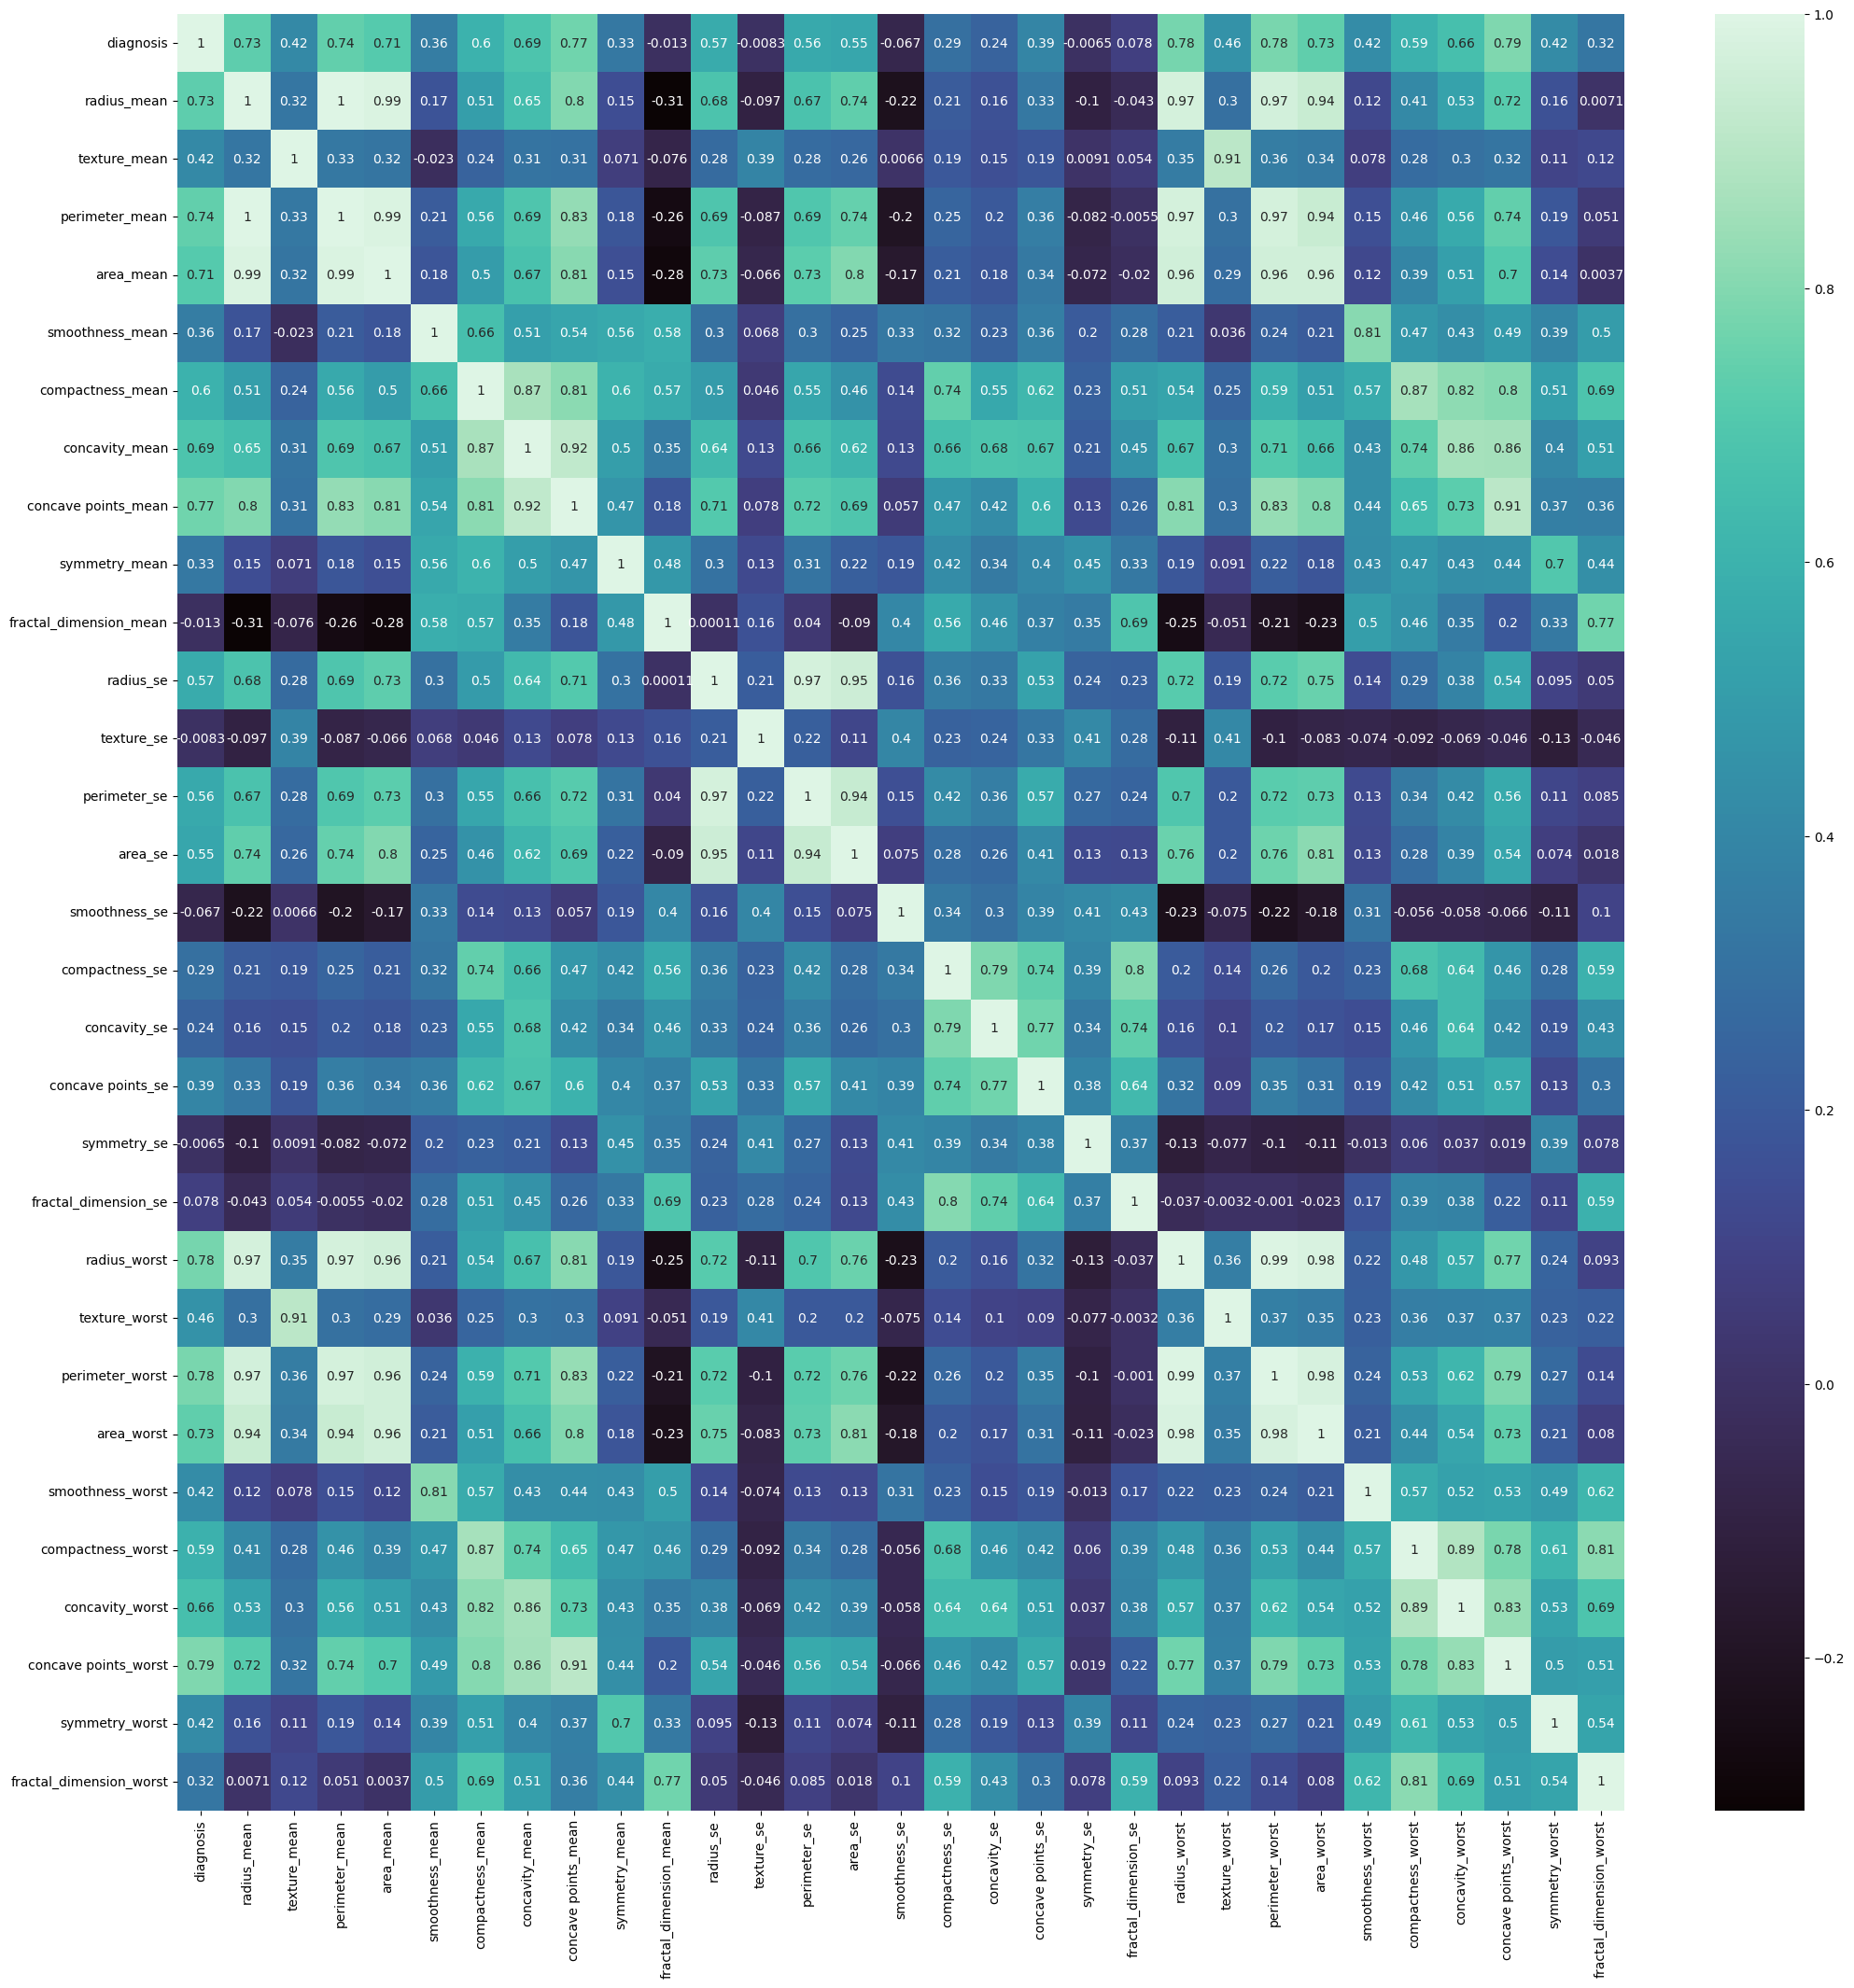

In [246]:
plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True, cmap='mako')

Bi·∫øn threshold ƒë∆∞·ª£c ƒë·∫∑t l√† 0.75, c√≥ nghƒ©a l√† ch·ªâ nh·ªØng bi·∫øn c√≥ t∆∞∆°ng quan tuy·ªát ƒë·ªëi v·ªõi bi·∫øn diagnosis l·ªõn h∆°n ho·∫∑c b·∫±ng 0.75 s·∫Ω ƒë∆∞·ª£c xem x√©t.

- correlation["diagnosis"]: ƒê√¢y l√† c·ªôt ch·ª©a h·ªá s·ªë t∆∞∆°ng quan gi·ªØa diagnosis v√† c√°c bi·∫øn kh√°c.
- np.abs(): L·∫•y gi√° tr·ªã tuy·ªát ƒë·ªëi c·ªßa h·ªá s·ªë t∆∞∆°ng quan, ƒë·ªÉ ki·ªÉm tra c·∫£ m·ªëi t∆∞∆°ng quan √¢m v√† d∆∞∆°ng.
- > threshold: Ch·ªçn nh·ªØng h·ªá s·ªë t∆∞∆°ng quan c√≥ gi√° tr·ªã l·ªõn h∆°n ng∆∞·ª°ng (0.75).

K·∫øt qu·∫£ c·ªßa d√≤ng n√†y l√† m·ªôt bi·∫øn filter, ch·ª©a c√°c gi√° tr·ªã True/False cho bi·∫øt bi·∫øn n√†o c√≥ t∆∞∆°ng quan l·ªõn h∆°n ng∆∞·ª°ng 0.75.

- correlation.columns[filter]: L·∫•y danh s√°ch t√™n c√°c c·ªôt c√≥ gi√° tr·ªã t∆∞∆°ng quan th·ªèa m√£n ƒëi·ªÅu ki·ªán c·ªßa filter.
- .tolist(): Chuy·ªÉn danh s√°ch c√°c t√™n c·ªôt n√†y th√†nh m·ªôt danh s√°ch Python (list)

- f[correlation_features].corr(): T√≠nh to√°n ma tr·∫≠n t∆∞∆°ng quan ch·ªâ d·ª±a tr√™n c√°c c·ªôt c√≥ t∆∞∆°ng quan cao (ƒë∆∞·ª£c l·ªçc tr∆∞·ªõc ƒë√≥).
- sns.clustermap(): T·∫°o bi·ªÉu ƒë·ªì clustermap trong Seaborn. ƒê√¢y l√† m·ªôt lo·∫°i bi·ªÉu ƒë·ªì gi·ªëng heatmap nh∆∞ng c√≥ th√™m t√≠nh nƒÉng ph√¢n c·ª•m -(clustering) ƒë·ªÉ nh√≥m c√°c ƒë·∫∑c tr∆∞ng c√≥ t∆∞∆°ng quan t∆∞∆°ng t·ª± l·∫°i v·ªõi nhau.
- annot=True: Hi·ªÉn th·ªã c√°c gi√° tr·ªã h·ªá s·ªë t∆∞∆°ng quan tr·ª±c ti·∫øp tr√™n bi·ªÉu ƒë·ªì.
- fmt=".2f": ƒê·ªãnh d·∫°ng c√°c gi√° tr·ªã h·ªá s·ªë t∆∞∆°ng quan v·ªõi 2 ch·ªØ s·ªë th·∫≠p ph√¢n.
- cmap='mako': S·ª≠ d·ª•ng b·∫£ng m√†u mako ƒë·ªÉ t√¥ m√†u c√°c √¥ trong heatmap.

<Figure size 1000x800 with 0 Axes>

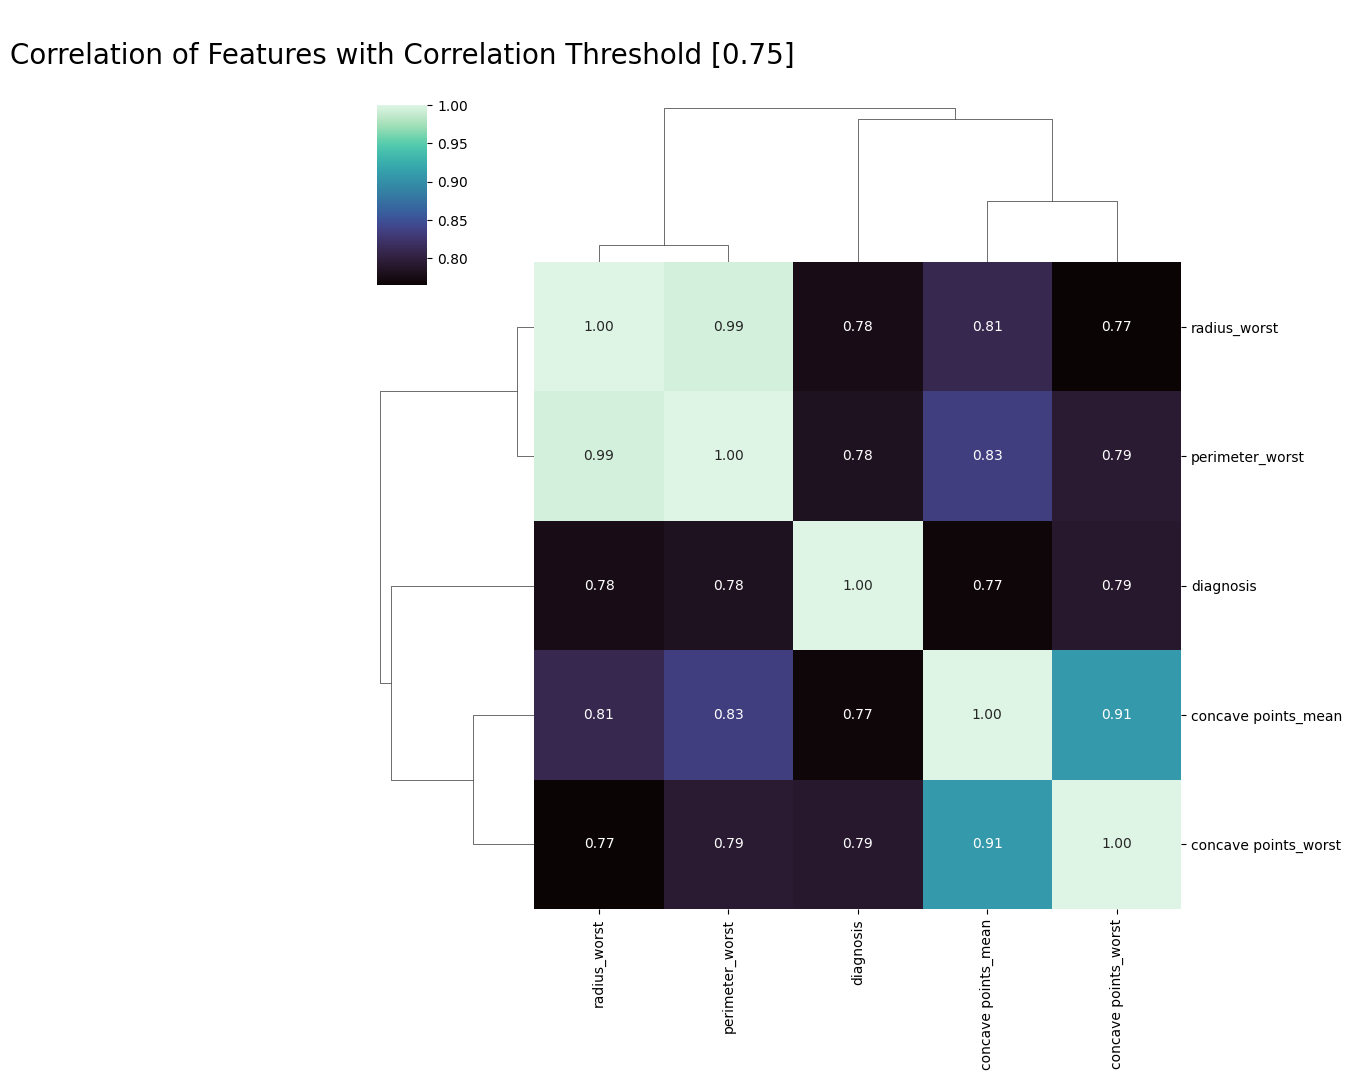

In [247]:
threshold = 0.75
filter = np.abs(correlation["diagnosis"] > threshold)
correlation_features = correlation.columns[filter].tolist()
plt.figure(figsize=(10,8)) # Thi·∫øt l·∫≠p k√≠ch th∆∞·ªõc c·ªßa figure v·ªõi chi·ªÅu r·ªông l√† 10 v√† chi·ªÅu cao l√† 8 inch.
sns.clustermap(df[correlation_features].corr(), annot = True, fmt = ".2f", cmap='mako')
plt.title("\nCorrelation of Features with Correlation Threshold [0.75]\n",fontsize=20)
plt.show()

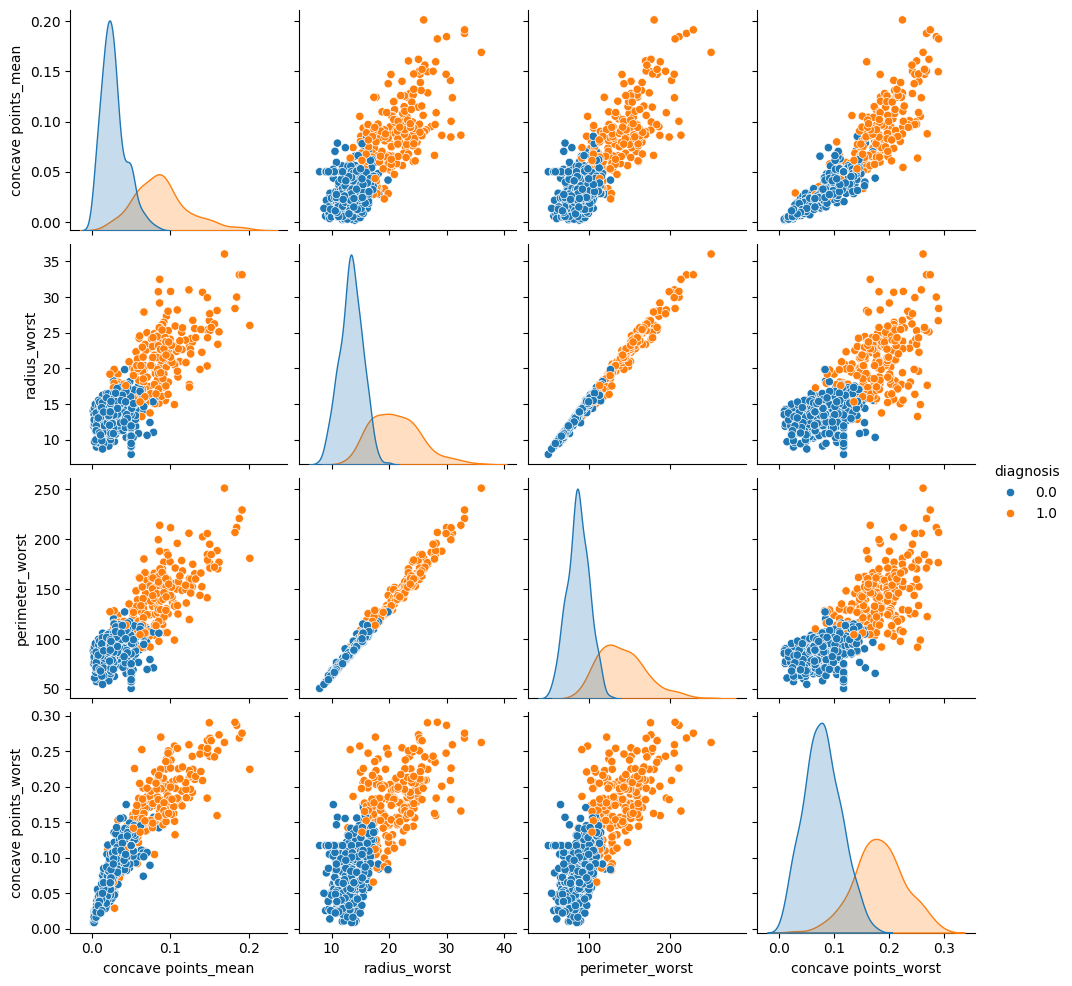

In [248]:
sns.pairplot(df[correlation_features], diag_kind = "kde",  hue="diagnosis")
plt.show()

- lo·∫°i b·ªè diagnosis kh·ªèi df
- axit = 1 --> x√≥a c·ªôt
- ph·∫ßn c√≤n l·∫°i c·ªßa df <-- X: c√°c bi·∫øn ƒë·∫ßu v√†o ƒë·ªÉ d·ª± ƒëo√°n ƒë·∫ßu ra y l√† diagnosis
- T·ª´ ·∫£nh ·ªü tr√™n r√µ r√†ng l√† radius_worst v√† perimeter_worst c√≥ ƒë·ªô t∆∞∆°ng quan l·ªõn --> ta b·ªè 1 thu·ªôc t√≠nh, ·ªü ƒë√¢y b·ªè radius_worst ƒë·ªÉ tr√°nh overfit 

In [249]:
X = df.drop(['diagnosis'], axis=1) #, 'radius_worst' n√™n b·ªè hay kh√¥ng ?
y = df['diagnosis']

Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán (training set) v√† t·∫≠p ki·ªÉm tra (test set)

train_test_split: ƒê√¢y l√† h√†m t·ª´ th∆∞ vi·ªán scikit-learn, ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ chia t·∫≠p d·ªØ li·ªáu th√†nh hai ph·∫ßn: t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra.

test_size=0.2:
- test_size ch·ªâ ƒë·ªãnh t·ª∑ l·ªá d·ªØ li·ªáu s·∫Ω ƒë∆∞·ª£c d√πng l√†m t·∫≠p ki·ªÉm tra.
- ·ªû ƒë√¢y, test_size=0.2 c√≥ nghƒ©a l√† 20% d·ªØ li·ªáu s·∫Ω ƒë∆∞·ª£c s·ª≠ d·ª•ng cho t·∫≠p ki·ªÉm tra, v√† 80% d·ªØ li·ªáu c√≤n l·∫°i s·∫Ω ƒë∆∞·ª£c d√πng cho t·∫≠p hu·∫•n luy·ªán.

random_state=42:
- random_state l√† m·ªôt tham s·ªë ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ƒë·∫£m b·∫£o t√≠nh t√°i l·∫≠p (reproducibility).
- Khi b·∫°n thi·∫øt l·∫≠p random_state=42, vi·ªác chia d·ªØ li·ªáu s·∫Ω lu√¥n t·∫°o ra c√πng m·ªôt k·∫øt qu·∫£ m·ªói khi b·∫°n ch·∫°y m√£, ƒë·∫£m b·∫£o k·∫øt qu·∫£ l√† nh·∫•t qu√°n khi b·∫°n th·ª≠ l·∫°i.
- Gi√° tr·ªã 42 kh√¥ng c√≥ √Ω nghƒ©a ƒë·∫∑c bi·ªát, n√≥ ch·ªâ l√† m·ªôt s·ªë ƒë∆∞·ª£c d√πng l√†m h·∫°t ng·∫´u nhi√™n (random seed).

stratify=y:
- T√°c d·ª•ng c·ªßa n√≥ l√† chia ƒë·ªÅu t·ªâ l·ªá cho c·∫£ c√°c m·∫´u d·ªØ li·ªáu nh√£n M v√† nh√£n B.

K·∫øt qu·∫£ c·ªßa train_test_split:
H√†m n√†y tr·∫£ v·ªÅ b·ªën bi·∫øn:
- X_train: T·∫≠p ƒë·∫∑c tr∆∞ng hu·∫•n luy·ªán, ch·ª©a 80% c·ªßa X: g·ªìm 80% m·∫´u d·ªØ li·ªáu c·ªßa nh√£n M, 80% m·∫´u d·ªØ li·ªáu c·ªßa nh√£n B.
- X_test: T·∫≠p ƒë·∫∑c tr∆∞ng ki·ªÉm tra, ch·ª©a 20% c·ªßa X: g·ªìm 20% m·∫´u d·ªØ li·ªáu c·ªßa nh√£n M, 20% m·∫´u d·ªØ li·ªáu c·ªßa nh√£n B.
- y_train: T·∫≠p nh√£n hu·∫•n luy·ªán, ch·ª©a 80% c·ªßa y: l√† nh√£n c·ªßa X_train, t·ª∑ l·ªá nh∆∞ tr√™n.
- y_test: T·∫≠p nh√£n ki·ªÉm tra, ch·ª©a 20% c·ªßa y.

# --> T√≥m l·∫°i l√† s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p Stratified sampling do d·ªØ li·ªáu nh·ªè (569 m·∫´u d·ªØ li·ªáu)

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41, stratify=y)

# Chu·∫©n h√≥a d·ªØ li·ªáu
ƒêo·∫°n m√£ n√†y s·ª≠ d·ª•ng StandardScaler t·ª´ th∆∞ vi·ªán scikit-learn ƒë·ªÉ chu·∫©n h√≥a d·ªØ li·ªáu. Vi·ªác chu·∫©n h√≥a l√† m·ªôt b∆∞·ªõc r·∫•t quan tr·ªçng trong quy tr√¨nh h·ªçc m√°y, ƒë·∫∑c bi·ªát l√† ƒë·ªëi v·ªõi c√°c m√¥ h√¨nh nh·∫°y c·∫£m v·ªõi s·ª± kh√°c bi·ªát v·ªÅ ƒë∆°n v·ªã ƒëo c·ªßa c√°c ƒë·∫∑c tr∆∞ng (nh∆∞ SVM, KNN, Logistic Regression,...).

StandardScaler: ƒê√¢y l√† m·ªôt c√¥ng c·ª• trong scikit-learn d√πng ƒë·ªÉ chu·∫©n h√≥a c√°c ƒë·∫∑c tr∆∞ng c·ªßa d·ªØ li·ªáu b·∫±ng c√°ch t·∫°o ra d·ªØ li·ªáu c√≥ ph√¢n ph·ªëi chu·∫©n (normal distribution) v·ªõi:
- Mean (trung b√¨nh) = 0.
- Standard Deviation (ƒë·ªô l·ªách chu·∫©n) = 1.

**C√¥ng th·ª©c chu·∫©n h√≥a**

X√©t l·∫ßn l∆∞·ª£t t·ª´ng c·ªôt thu·ªôc t√≠nh, v·ªõi m·ªói x th√¨ ta chu·∫©n h√≥a th√†nh $x_{\text{scaled}}$ nh∆∞ sau:
$$
x_{\text{scaled}} = \frac{x - \mu}{\sigma}
$$

Trong ƒë√≥:
- ùë• l√† gi√° tr·ªã c·ªßa d·ªØ li·ªáu.
- N l√† s·ªë m·∫´u d·ªØ li·ªáu, ·ªü ƒë√¢y c·ª• th·ªÉ b·∫±ng 569
- $\mu$ l√† gi√° tr·ªã trung b√¨nh c·ªßa ƒë·∫∑c tr∆∞ng, ƒë∆∞·ª£c t√≠nh nh∆∞ sau:
$$
\mu = \frac{x_1 + x_2 + x_3 + \dots + x_N}{N} 
$$

- $\sigma$ l√† ƒë·ªô l·ªách chu·∫©n c·ªßa ƒë·∫∑c tr∆∞ng, ƒë∆∞·ª£c t√≠nh nh∆∞ sau:
$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

In [251]:
s = StandardScaler()
#s = MinMaxScaler()

X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [252]:
Algorithm = ['RandomForest', 'KNeighborsClassifier','LogisticRegression','Naive Bayes', 'SVM', 'VotingClassifier']
Accuracy=[] # list l∆∞u tr·ªØ ƒë·ªô ch√≠nh x√°c c·ªßa c√°c m√¥ h√¨nh h·ªçc m√°y

# Th·ª±c hi·ªán c√°c b∆∞·ªõc hu·∫•n luy·ªán v√† ƒë√°nh gi√° m·ªôt m√¥ h√¨nh h·ªçc m√°y (machine learning). 
N√≥ bao g·ªìm vi·ªác hi·ªÉn th·ªã ma tr·∫≠n nh·∫ßm l·∫´n (confusion matrix), t√≠nh ƒë·ªô ch√≠nh x√°c (accuracy), v√† in ra b√°o c√°o ph√¢n lo·∫°i (classification report).

Ma tr·∫≠n nh·∫ßm l·∫´n bao g·ªìm:
- True Positive (TP): S·ªë tr∆∞·ªùng h·ª£p m√† m√¥ h√¨nh d·ª± ƒëo√°n ch√≠nh x√°c l√† Positive (ƒë√∫ng l√† Positive).
- True Negative (TN): S·ªë tr∆∞·ªùng h·ª£p m√† m√¥ h√¨nh d·ª± ƒëo√°n ch√≠nh x√°c l√† Negative (ƒë√∫ng l√† Negative).
- False Positive (FP): S·ªë tr∆∞·ªùng h·ª£p m√† m√¥ h√¨nh d·ª± ƒëo√°n sai l√† Positive (th·ª±c t·∫ø l√† Negative).
- False Negative (FN): S·ªë tr∆∞·ªùng h·ª£p m√† m√¥ h√¨nh d·ª± ƒëo√°n sai l√† Negative (th·ª±c t·∫ø l√† Positive). 

|              | Predicted Negative | Predicted Positive |
|--------------|--------------------|--------------------|
| Actual Negative | True Negative (TN)  | False Positive (FP) |
| Actual Positive | False Negative (FN) | True Positive (TP)  |

group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)] --> ƒë∆∞a c√°c k·∫øt qu·∫£ v·ªÅ ph·∫ßn trƒÉm

T√≠nh nh∆∞ sau: 
$$
TP\% = \frac{TP}{TP + TN + FP + FN}
$$

T∆∞∆°ng t·ª± v·ªõi c√°c th√†nh ph·∫ßn c√≤n l·∫°i

F1-score l√† m·ªôt th∆∞·ªõc ƒëo hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh, ƒë·∫∑c bi·ªát h·ªØu √≠ch khi d·ªØ li·ªáu m·∫•t c√¢n b·∫±ng, nh∆∞ trong c√°c b√†i to√°n y t·∫ø ho·∫∑c ph√°t hi·ªán gian l·∫≠n. F1-score l√† trung b√¨nh ƒëi·ªÅu h√≤a gi·ªØa precision (ƒë·ªô ch√≠nh x√°c) v√† recall (ƒë·ªô nh·∫°y), gi√∫p b·∫°n ƒë√°nh gi√° m√¥ h√¨nh m·ªôt c√°ch to√†n di·ªán h∆°n.

C√¥ng th·ª©c t√≠nh F1-score ƒë∆∞·ª£c t√≠nh d·ª±a tr√™n precision v√† recall v·ªõi c√¥ng th·ª©c:
$$
\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- Precision: T·ª∑ l·ªá d·ª± ƒëo√°n ƒë√∫ng tr√™n t·ªïng s·ªë l·∫ßn m√¥ h√¨nh d·ª± ƒëo√°n l√† d∆∞∆°ng.
$$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
$$

- Recall: T·ª∑ l·ªá d·ª± ƒëo√°n ƒë√∫ng tr√™n t·ªïng s·ªë m·∫´u th·ª±c t·∫ø l√† d∆∞∆°ng.
$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

# Random Forest

In [253]:
from sklearn.model_selection import GridSearchCV

#Thi·∫øt l·∫≠p b·ªô tham s·ªë
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'oob_score': [True, False],   # oob_score ch·ªâ c√≥ t√°c d·ª•ng n·∫øu bootstrap=True
    'class_weight': ['balanced', 'balanced_subsample']
}

# Kh·ªüi t·∫°o m√¥ h√¨nh Random Forest
rf = RandomForestClassifier(random_state=42)

# Kh·ªüi t·∫°o GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1)

# Hu·∫•n luy·ªán GridSearchCV tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán
grid_search.fit(X_train, y_train)

# K·∫øt qu·∫£
print("Best parameters found: ", grid_search.best_params_)
RF_bootstrap = grid_search.best_params_['bootstrap']
RF_class_weight = grid_search.best_params_['class_weight']
RF_max_depth = grid_search.best_params_['max_depth']
RF_max_features = grid_search.best_params_['max_features']
RF_n_estimators = grid_search.best_params_['n_estimators']
RF_oob_score = grid_search.best_params_['oob_score']

print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'bootstrap': True, 'class_weight': 'balanced_subsample', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200, 'oob_score': True}
Best cross-validation score:  0.9673353964703051


confusion matrix


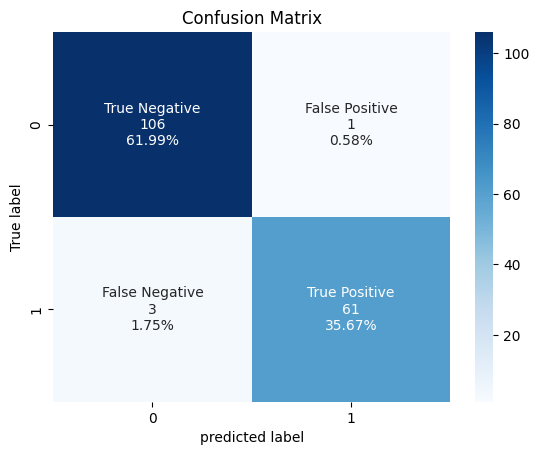

[[106   1]
 [  3  61]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       107
         1.0       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

weighted_f1_score :  97.65308332559795


In [254]:
model_1 = RandomForestClassifier(
    bootstrap=RF_bootstrap,
    class_weight=RF_class_weight,
    max_depth=RF_max_depth,
    max_features=RF_max_features,
    n_estimators=RF_n_estimators,
    oob_score=RF_oob_score
)

algorithm(model_1, X_train, y_train, X_test, y_test, Accuracy)

# K Nearest Neighbor

In [255]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Thi·∫øt l·∫≠p kh√¥ng gian tham s·ªë cho m√¥ h√¨nh KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # S·ªë l∆∞·ª£ng h√†ng x√≥m l√¢n c·∫≠n (K)
    'weights': ['uniform', 'distance'],  # Tr·ªçng s·ªë h√†ng x√≥m (c√¢n nh·∫Øc kho·∫£ng c√°ch ho·∫∑c kh√¥ng)
    'metric': ['euclidean', 'manhattan', 'minkowski']  # ƒêo l∆∞·ªùng kho·∫£ng c√°ch
}

# T√¨m ki·∫øm tham s·ªë t·ªëi ∆∞u
# V·ªõi scoring='f1': S·ª≠ d·ª•ng F1-score c·ªßa l·ªõp d∆∞∆°ng.
# V·ªõi scoring=make_scorer(f1_score, average='weighted'): S·ª≠ d·ª•ng weighted average F1-score.
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring=make_scorer(f1_score, average='weighted'))  # cv = 10 t·ª©c l√† k-fold ·ªü ƒë√¢y k = 10
grid_search.fit(X_train, y_train)

# K·∫øt qu·∫£
print("Best Parameters:", grid_search.best_params_)
knn_neighbors = grid_search.best_params_.get('n_neighbors')
knn_weights = grid_search.best_params_.get('weights')
knn_metric = grid_search.best_params_.get('metric')

print(knn_neighbors, knn_weights, knn_metric)

print("Best cross-validated score:", grid_search.best_score_)

# S·ª≠ d·ª•ng tham s·ªë t·ªët nh·∫•t ƒë·ªÉ hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh
best_knn_model = grid_search.best_estimator_
y_pred_optimized = best_knn_model.predict(X_test)

# ƒê√°nh gi√° m√¥ h√¨nh t·ªëi ∆∞u
print("\nConfusion Matrix (Optimized):")
print(confusion_matrix(y_test, y_pred_optimized))

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized))


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
7 uniform euclidean
Best cross-validated score: 0.9694489663510035

Confusion Matrix (Optimized):
[[106   1]
 [  3  61]]

Classification Report (Optimized):
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       107
         1.0       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



confusion matrix


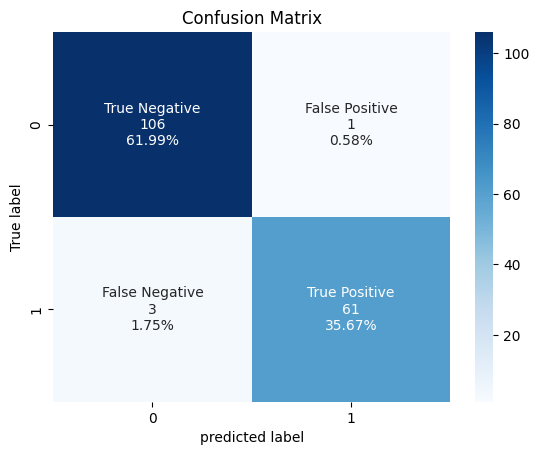

[[106   1]
 [  3  61]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       107
         1.0       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

weighted_f1_score :  97.65308332559795


In [256]:
"""
knn = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='euclidean',
    n_jobs=-1
)
"""
# t·∫°i sao ch·ªçn tham s·ªë nh∆∞ v·∫≠y ? 
# v√¨ n√≥ cho k·∫øt qu·∫£ t·ªët nh·∫•t
# t·∫°i sao l·∫°i cho k·∫øt qu·∫£ t·ªët nh·∫•t ?
# v√¨ n√≥ ƒë√£ ƒë∆∞·ª£c t√¨m ki·∫øm th√¥ng qua grid search
model_3 = KNeighborsClassifier(n_neighbors=knn_neighbors, weights=knn_weights, metric=knn_metric)
algorithm(model_3, X_train, y_train, X_test, y_test, Accuracy)

# Logistic Regression

In [257]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# ƒê·ªãnh nghƒ©a kh√¥ng gian tham s·ªë
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# Kh·ªüi t·∫°o LogisticRegression

# Grid Search
# verbose=1: Hi·ªÉn th·ªã qu√° tr√¨nh t√¨m ki·∫øm tham s·ªë t·ªët nh·∫•t
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=10, scoring=make_scorer(f1_score, average='weighted'), verbose=1)
grid_search.fit(X_train, y_train)

# L·∫•y k·∫øt qu·∫£ t·ªët nh·∫•t
best_model = grid_search.best_estimator_
LR_C = grid_search.best_params_.get('C')
LR_penalty = grid_search.best_params_.get('penalty')
LR_solver = grid_search.best_params_.get('solver')
LR_max_iter = grid_search.best_params_.get('max_iter')
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# S·ª≠ d·ª•ng tham s·ªë t·ªët nh·∫•t ƒë·ªÉ hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh
best_LR_model = grid_search.best_estimator_
y_pred_optimized = best_LR_model.predict(X_test)

# ƒê√°nh gi√° m√¥ h√¨nh t·ªëi ∆∞u
print("\nConfusion Matrix (Optimized):")
print(confusion_matrix(y_test, y_pred_optimized))

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized))


Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validated score: 0.9772529788878875

Confusion Matrix (Optimized):
[[107   0]
 [  1  63]]

Classification Report (Optimized):
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       107
         1.0       1.00      0.98      0.99        64

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



confusion matrix


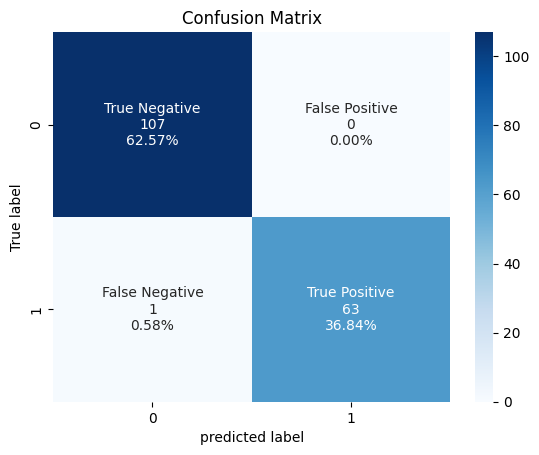

[[107   0]
 [  1  63]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       107
         1.0       1.00      0.98      0.99        64

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

weighted_f1_score :  99.41426232369669


In [258]:
# LogisticRegression(tham s·ªë m·∫∑c ƒë·ªãnh): C = 1.0, penalty = 'l2', solver = 'lbfgs', max_iter = 100
model_4 = LogisticRegression(C = LR_C, penalty = LR_penalty, solver = LR_solver, max_iter = LR_max_iter)
algorithm(model_4, X_train, y_train, X_test, y_test, Accuracy)

# Naive Bayes

In [259]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Thi·∫øt l·∫≠p kh√¥ng gian tham s·ªë cho GaussianNB (ch·ªâ c√≥ var_smoothing)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Gi√° tr·ªã var_smoothing cho GaussianNB
}

# T√¨m ki·∫øm tham s·ªë t·ªëi ∆∞u
# V·ªõi scoring=make_scorer(f1_score, average='weighted'): S·ª≠ d·ª•ng weighted average F1-score.
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=10, scoring=make_scorer(f1_score, average='weighted'))  # cv = 5 t·ª©c l√† k-fold ·ªü ƒë√¢y k = 5
grid_search.fit(X_train, y_train)

# K·∫øt qu·∫£
print("Best Parameters:", grid_search.best_params_)
NB_var_smoothing = grid_search.best_params_.get('var_smoothing')
print("Best cross-validated score:", grid_search.best_score_)

# S·ª≠ d·ª•ng tham s·ªë t·ªët nh·∫•t ƒë·ªÉ hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh
best_NB_model = grid_search.best_estimator_
y_pred_optimized = best_NB_model.predict(X_test)

# ƒê√°nh gi√° m√¥ h√¨nh t·ªëi ∆∞u
print("\nConfusion Matrix (Optimized):")
print(confusion_matrix(y_test, y_pred_optimized))

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized))


Best Parameters: {'var_smoothing': 1e-09}
Best cross-validated score: 0.9270228536319219

Confusion Matrix (Optimized):
[[100   7]
 [  5  59]]

Classification Report (Optimized):
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       107
         1.0       0.89      0.92      0.91        64

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



confusion matrix


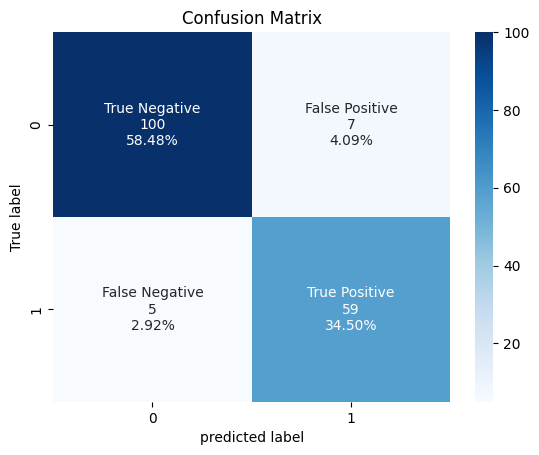

[[100   7]
 [  5  59]]
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       107
         1.0       0.89      0.92      0.91        64

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

weighted_f1_score :  93.00333562498409


In [260]:
model_5 = GaussianNB(var_smoothing=NB_var_smoothing)
algorithm(model_5, X_train, y_train, X_test, y_test, Accuracy)

# SVM
T·∫≠p d·ªØ li·ªáu D v·ª´a v√† nh·ªè n√™n ta s·∫Ω d√πng ph∆∞∆°ng ph√°p ƒë√°nh gi√° cross-validation

k-fold cross-validation. Ph∆∞∆°ng ph√°p n√†y g·ªìm c√°c b∆∞·ªõc nh∆∞ sau:
- T·∫≠p d·ªØ li·ªáu D ƒë∆∞·ª£c chia th√†nh k t·∫≠p con kh√¥ng giao nhau g·ªçi l√† ‚Äúfold‚Äù c√≥ k√≠ch th∆∞·ªõc x·∫•p x·ªâ nhau.
- M·ªói l·∫ßn l·∫∑p, m·ªôt t·∫≠p con trong k t·∫≠p s·∫Ω ƒë∆∞·ª£c d√πng ƒë·ªÉ l√†m t·∫≠p ki·ªÉm th·ª≠, (k-1) t·∫≠p c√≤n l·∫°i s·∫Ω ƒë∆∞·ª£c s·ª≠ d·ª•ng l√†m t·∫≠p hu·∫•n luy·ªán.
- k gi√° tr·ªã l·ªói trong c√°c l·∫ßn l·∫∑p, trong ƒë√≥ m·ªói gi√° tr·ªã l·ªói t∆∞∆°ng ·ª©ng v·ªõi m·ªói ‚Äúfold‚Äù s·∫Ω
 ƒë∆∞·ª£c t√≠nh trung b√¨nh c·ªông ƒë·ªÉ thu ƒë∆∞·ª£c gi√° tr·ªã l·ªói t·ªïng th·ªÉ.

V·ªõi d·ªØ li·ªáu y t·∫ø ho·∫∑c ch·∫©n ƒëo√°n, F1-score l√† th∆∞·ªõc ƒëo ph√π h·ª£p h∆°n so v·ªõi accuracy do:
- M·∫•t c√¢n b·∫±ng d·ªØ li·ªáu (th∆∞·ªùng c√≥ nhi·ªÅu m·∫´u l√†nh t√≠nh h∆°n m·∫´u √°c t√≠nh).
- T·∫ßm quan tr·ªçng c·ªßa vi·ªác c√¢n b·∫±ng gi·ªØa precision v√† recall, nh·∫±m gi·∫£m thi·ªÉu r·ªßi ro c·ªßa c√°c d·ª± ƒëo√°n sai.
--> F1-score k·∫øt h·ª£p precision v√† recall th√†nh m·ªôt th∆∞·ªõc ƒëo duy nh·∫•t, h·ªØu √≠ch trong c√°c tr∆∞·ªùng h·ª£p d·ªØ li·ªáu m·∫•t c√¢n b·∫±ng ho·∫∑c c·∫ßn c√¢n nh·∫Øc k·ªπ v·ªÅ c√°c l·ªói d∆∞∆°ng t√≠nh gi·∫£ v√† √¢m t√≠nh gi·∫£. V·ªõi F1-score cao, m√¥ h√¨nh v·ª´a c√≥ kh·∫£ nƒÉng ph√°t hi·ªán ƒë√∫ng c√°c m·∫´u d∆∞∆°ng t√≠nh v·ª´a tr√°nh c√°c l·ªói quan tr·ªçng nh∆∞ b·ªè s√≥t tr∆∞·ªùng h·ª£p ung th∆∞ ho·∫∑c gian l·∫≠n.

In [261]:
from sklearn.model_selection import GridSearchCV # T√≠ch h·ª£p cross-validation

# Thi·∫øt l·∫≠p kh√¥ng gian tham s·ªë quan tr·ªçng trong m√¥ h√¨nh SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'] #th√™m 'linear', 'poly', 'sigmoid' n·∫øu mu·ªën th·ª≠ c√°c kernel kh√°c 
}

# T√¨m ki·∫øm tham s·ªë t·ªëi ∆∞u
# f1 ·ªü ƒë√¢y c·ª• th·ªÉ l√† weighted avg f1-score ƒë√∫ng kh√¥ng ? 
grid_search = GridSearchCV(SVC(), param_grid, cv=10     , scoring=make_scorer(f1_score, average='weighted')) # cv = 5 t·ª©c l√† k-fold ·ªü ƒë√¢y k = 5
grid_search.fit(X_train, y_train)

# K·∫øt qu·∫£
print("Best Parameters:", grid_search.best_params_)
svm_C = grid_search.best_params_.get('C')
svm_gamma = grid_search.best_params_.get('gamma')
svm_kernel = grid_search.best_params_.get('kernel')

print(svm_C, svm_gamma, svm_kernel)

print("Best cross-validated score:", grid_search.best_score_)
# S·ª≠ d·ª•ng tham s·ªë t·ªët nh·∫•t ƒë·ªÉ hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh
best_svm_model = grid_search.best_estimator_
y_pred_optimized = best_svm_model.predict(X_test)

# ƒê√°nh gi√° m√¥ h√¨nh t·ªëi ∆∞u
print("\nConfusion Matrix (Optimized):")
print(confusion_matrix(y_test, y_pred_optimized))

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized))

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
10 0.01 rbf
Best cross-validated score: 0.9821081385730178

Confusion Matrix (Optimized):
[[104   3]
 [  2  62]]

Classification Report (Optimized):
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       107
         1.0       0.95      0.97      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



rbf
10
0.01
confusion matrix


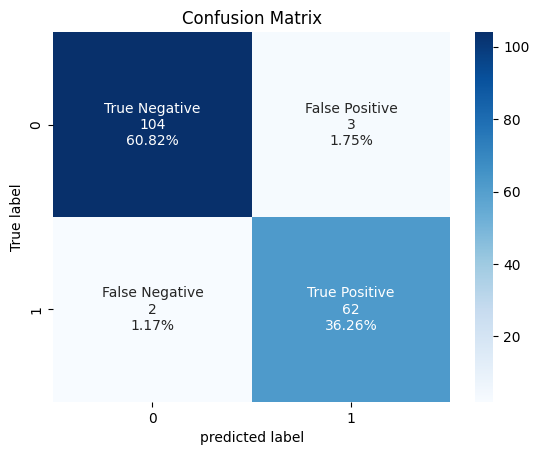

[[104   3]
 [  2  62]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       107
         1.0       0.95      0.97      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

weighted_f1_score :  97.08049283962536


In [262]:
model_6 = SVC(kernel=svm_kernel, C=svm_C, gamma=svm_gamma, random_state=30) # kernel='rbf' l√† kernel Gaussian ph·ªï bi·∫øn cho d·ªØ li·ªáu phi tuy·∫øn
#model_6.fit(X_train, y_train)
print(model_6.kernel)
print(model_6.C)
print(model_6.gamma)
algorithm(model_6, X_train, y_train, X_test, y_test, Accuracy)

confusion matrix


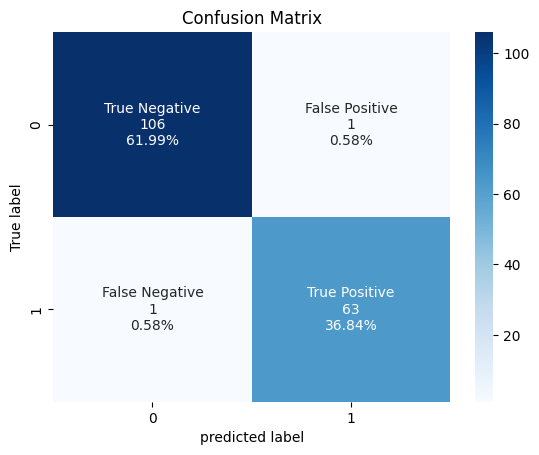

[[106   1]
 [  1  63]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       107
         1.0       0.98      0.98      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

weighted_f1_score :  98.83040935672514


In [263]:
from sklearn.ensemble import VotingClassifier

# voting = 'hard': nh√£n cu·ªëi c√πng ƒë∆∞·ª£c ch·ªçn d·ª±a tr√™n s·ªë phi·∫øu b·∫ßu, t·ª©c l√† s·ªë l∆∞·ª£ng m√¥ h√¨nh h·ªçc m√°y ƒë·ªìng thu·∫≠n
model_7 = VotingClassifier(estimators=[('RF', model_1), ('KNN', model_3), ('LR', model_4), ('NB', model_5), ('SVM', model_6)], voting='hard')
algorithm(model_7, X_train, y_train, X_test, y_test, Accuracy)

In [264]:
print(Accuracy)

[97.65308332559795, 97.65308332559795, 99.41426232369669, 93.00333562498409, 97.08049283962536, 98.83040935672514]


In [265]:
score = pd.DataFrame({'Algorithm':Algorithm,'Weighted_f1':Accuracy })
score

Algorithm  Weighted_f1
0          RandomForest    97.653083
1  KNeighborsClassifier    97.653083
2    LogisticRegression    99.414262
3           Naive Bayes    93.003336
4                   SVM    97.080493
5      VotingClassifier    98.830409

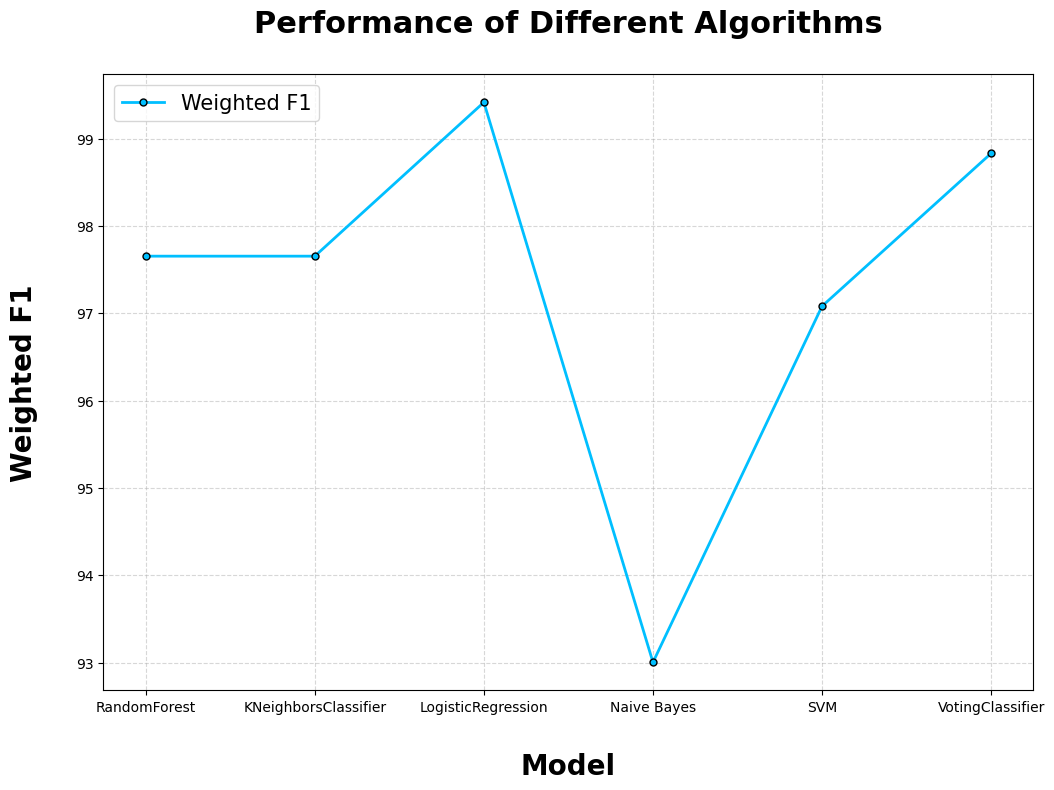

In [266]:
# T·∫°o h√¨nh v·∫Ω v·ªõi k√≠ch th∆∞·ªõc l·ªõn h∆°n
fig = plt.figure(figsize=(12,8))

# V·∫Ω ƒë·ªì th·ªã v·ªõi m√†u s·∫Øc v√† ki·ªÉu marker kh√°c
plt.plot(score.Algorithm, score.Weighted_f1, 
         label='Weighted F1', 
         lw=2, color='deepskyblue', # lw = line width l√† ƒë·ªô d√†y c·ªßa ƒë∆∞·ªùng trong bi·ªÉu ƒë·ªì
         marker='o', markersize=5, # marker='o' l√† ki·ªÉu marker h√¨nh tr√≤n, markersize=5 l√† k√≠ch th∆∞·ªõc c·ªßa marker
         markeredgewidth=1, markeredgecolor='black')

# Th√™m l∆∞·ªõi (grid)
plt.grid(True, linestyle='--', alpha=0.5)

# Th√™m legend
plt.legend(fontsize=15, loc='upper left')

# ƒê·∫∑t nh√£n cho tr·ª•c X v√† Y
plt.xlabel('\nModel', fontsize=20, fontweight='bold')
plt.ylabel('Weighted F1\n', fontsize=20, fontweight='bold')

# Th√™m ti√™u ƒë·ªÅ cho bi·ªÉu ƒë·ªì
plt.title('Performance of Different Algorithms\n', fontsize=22, fontweight='bold')

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()
